In [57]:
import pandas as pd
import seaborn as sns

In [86]:
url = 'https://raw.githubusercontent.com/adicohen1/Final-Project/main/Data/Wellbeing_and_lifestyle_data_Kaggle.csv'
df = pd.read_csv(url)
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

the Timestemp column is an object, lets convert it to pd.datetime.

The daily stress column represent the level of stress between 0 and 5.
we would expect that this column will be numeric but as we can see from the df.info() above, it is object, that means that there are inappropriate values in this column, therfore we need to fix it.
we would like to see which values this column contains and clean it appropriately.

In [91]:
df['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

As we can see there is a value that is not numeric - '1/1/00'.
lets check how many of the rows in that data contain this value.

In [92]:
df[df['DAILY_STRESS'] == '1/1/00']

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
10005,12/18/18 10:37,3,1/1/00,1,2,10,10,5,5,2,...,6,10,1,2,10,8,2,21 to 35,Male,682.6


we can see that there is only one row containing this value. the data contains almost 16000 rows, dropping one row would not harm the data.

In [103]:
index_to_drop = df[df['DAILY_STRESS'] == '1/1/00'].index
df.drop(index_to_drop, inplace=True)

finally, we need to convert the type of column to be numeric.

In [106]:
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'])

the column of age is also an object. it contains ranges of ages and not the age itself. in order to see the correlation of age to the other features we need to transform it to dummies.

In [107]:
df['AGE'].unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [114]:
df = pd.get_dummies(data=df, columns=['AGE'])

the column of gender is also an object. it contains str of female or male. in order to see the correlation of gender to the other features we need to transform it to dummies.

In [115]:
df['GENDER'].unique()

array(['Female', 'Male'], dtype=object)

In [116]:
df = pd.get_dummies(data=df, columns=['GENDER'])

In [117]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,GENDER_Female,GENDER_Male
0,7/7/15,3,2,2,5,0,5,2,0,1,...,4,0,5,609.5,0,1,0,0,1,0
1,7/7/15,2,3,4,3,8,10,5,2,2,...,3,2,6,655.6,0,1,0,0,1,0
2,7/7/15,2,3,3,4,4,10,3,2,2,...,4,8,3,631.6,0,1,0,0,1,0
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,2,0,622.7,0,0,1,0,1,0
4,7/7/15,5,1,3,3,10,4,2,4,2,...,8,1,5,663.9,0,0,1,0,1,0


************************************************************************

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.000000,0.254889,0.157774,0.204461,0.106941,0.162902,0.199457,-0.092967,0.227005,0.133073,0.251213,0.110105,0.103627,-0.074100,-0.072916,0.148239,0.167818,0.164572,0.196087,0.452255
PLACES_VISITED,0.254889,1.000000,0.255877,0.237847,0.149253,0.257917,0.204478,-0.108139,0.227652,0.138559,0.196110,0.143699,0.127311,-0.129300,-0.092050,0.176612,0.269582,0.177729,0.209342,0.529615
CORE_CIRCLE,0.157774,0.255877,1.000000,0.337718,0.308657,0.289417,0.221758,-0.026055,0.224361,0.237885,0.148006,0.219937,0.066388,-0.080940,-0.066530,0.123063,0.253846,0.227632,0.105337,0.507541
SUPPORTING_OTHERS,0.204461,0.237847,0.337718,1.000000,0.316265,0.360086,0.393212,0.038655,0.256691,0.278600,0.147592,0.236693,0.007051,-0.018090,-0.048353,0.113384,0.332744,0.327846,0.144171,0.548851
SOCIAL_NETWORK,0.106941,0.149253,0.308657,0.316265,1.000000,0.249040,0.156867,0.019927,0.204437,0.244724,0.215797,0.182483,-0.029722,0.016641,-0.000102,0.123675,0.209119,0.200631,-0.006708,0.412586
ACHIEVEMENT,0.162902,0.257917,0.289417,0.360086,0.249040,1.000000,0.233713,-0.019670,0.304973,0.386572,0.185947,0.320673,0.045240,0.000771,-0.044503,0.113791,0.396186,0.368939,0.164670,0.561244
DONATION,0.199457,0.204478,0.221758,0.393212,0.156867,0.233713,1.000000,0.064630,0.193843,0.172625,0.113417,0.164831,-0.001410,-0.022135,-0.046957,0.120625,0.277812,0.193160,0.144073,0.458829
BMI_RANGE,-0.092967,-0.108139,-0.026055,0.038655,0.019927,-0.019670,0.064630,1.000000,-0.061498,0.026909,-0.131451,0.000070,-0.098215,0.036822,0.060412,-0.011816,0.019109,-0.006108,-0.078286,-0.251988
TODO_COMPLETED,0.227005,0.227652,0.224361,0.256691,0.204437,0.304973,0.193843,-0.061498,1.000000,0.301271,0.200432,0.269874,0.113609,-0.078463,-0.135584,0.203842,0.247062,0.274471,0.182552,0.545503
FLOW,0.133073,0.138559,0.237885,0.278600,0.244724,0.386572,0.172625,0.026909,0.301271,1.000000,0.143737,0.305978,0.029893,0.006212,-0.062331,0.077805,0.221226,0.483433,0.140836,0.478199


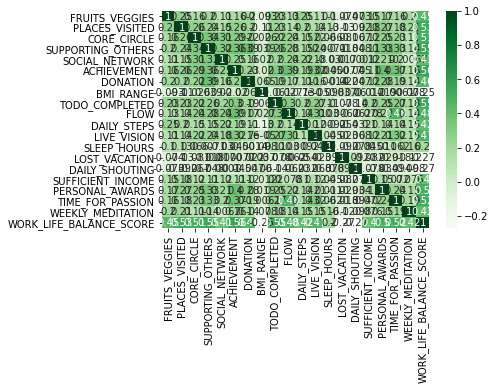

In [84]:
sns.heatmap(data=df.corr(),cmap='Greens', annot=True)
df.corr()

In [81]:
p.Timestamp = pd.to_datetime(p.Timestamp)

In [82]:
sns.heatmap(data=p,cmap='Greens', annot=True)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [64]:
a = p[['FRUITS_VEGGIES','DAILY_STRESS','PLACES_VISITED','CORE_CIRCLE','SUPPORTING_OTHERS','SOCIAL_NETWORK','ACHIEVEMENT']]

In [66]:
sns.heatmap(data=a,cmap='Greens', annot=True)

ValueError: could not convert string to float: '1/1/00'